In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [2]:
# Define binary patterns (5x6 = 30 pixels each)
A = np.array([
    0,1,1,1,1,0,
    1,0,0,0,0,1,
    1,1,1,1,1,1,
    1,0,0,0,0,1,
    1,0,0,0,0,1
])

B = np.array([
    1,1,1,1,1,0,
    1,0,0,0,0,1,
    1,1,1,1,1,0,
    1,0,0,0,0,1,
    1,1,1,1,1,0
])

C = np.array([
    0,1,1,1,1,1,
    1,0,0,0,0,0,
    1,0,0,0,0,0,
    1,0,0,0,0,0,
    0,1,1,1,1,1
])

In [3]:
# Combine into training data
X = np.array([A, B, C])
Y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])

In [4]:
# Initialize neural network parameters
np.random.seed(42)
input_size = 30
hidden_size = 10
output_size = 3
lr = 0.1
epochs = 1000

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [5]:
losses = []

for epoch in range(epochs):
    # Feedforward
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Loss (cross-entropy)
    loss = -np.mean(Y * np.log(A2 + 1e-8))
    losses.append(loss)

    # Backpropagation
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_deriv(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.1383
Epoch 100, Loss: 0.0383
Epoch 200, Loss: 0.0150
Epoch 300, Loss: 0.0091
Epoch 400, Loss: 0.0065
Epoch 500, Loss: 0.0050
Epoch 600, Loss: 0.0041
Epoch 700, Loss: 0.0034
Epoch 800, Loss: 0.0030
Epoch 900, Loss: 0.0026


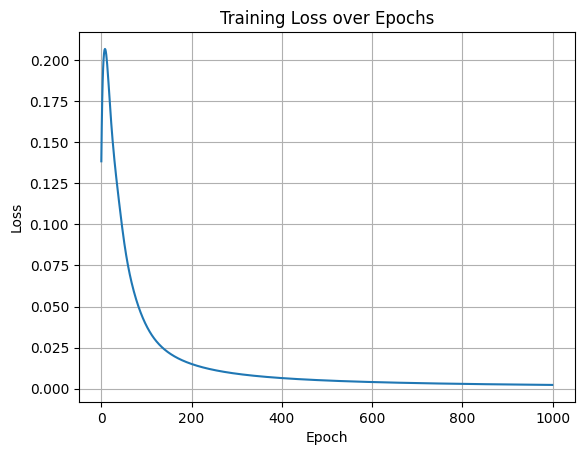

In [6]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [7]:
def predict(img):
    Z1 = np.dot(img, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return np.argmax(A2), A2

Predicted Class: B
Probabilities: [[0.00690501 0.99052712 0.0022309 ]]


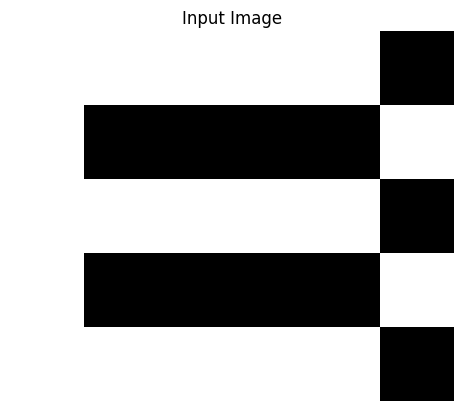

In [8]:
test_img = B.reshape(1, -1)
predicted_class, probs = predict(test_img)
print("Predicted Class:", ["A", "B", "C"][predicted_class])
print("Probabilities:", probs)

plt.imshow(test_img.reshape(5, 6), cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()